In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0206/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
# work for files 604, and 659 were missing from the submitted jobs - these were later re-run again individually. 659 worked fine. for 604, it worked when the seed was changed

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 452 ms, sys: 8.51 ms, total: 460 ms
Wall time: 462 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,0.000668,-0.007574,0.687456,0.004151,0.002492,0.062060,0.026866,-0.034676,0.387143,0.094574,...,0.0,-0.002634,0.0,0.004338,0.0,-0.007307,0.0,0.000937,0.0,-0.004733
1,0.000000,-0.013780,0.000078,-0.008567,0.402709,0.063646,0.004043,-0.010617,0.000066,0.094666,...,0.0,-0.006704,0.0,0.000421,0.0,-0.007599,0.0,0.020952,0.0,-0.000377
2,0.000000,-0.008464,0.000322,-0.009581,0.679359,0.051287,0.004485,-0.011375,0.000000,0.103627,...,0.0,-0.004567,0.0,-0.006995,0.0,-0.012070,0.0,0.006679,0.0,-0.002858
3,0.000000,0.000206,0.007729,-0.007301,0.014685,0.036077,0.000000,0.004675,0.000000,0.109277,...,0.0,0.001867,0.0,0.002079,0.0,-0.000253,0.0,0.010190,0.0,-0.000558
4,0.000000,-0.004801,0.000000,-0.010896,0.000000,0.070642,0.000000,0.007973,0.000000,0.100701,...,0.0,0.006470,0.0,-0.001759,0.0,0.002579,0.0,-0.002977,0.0,0.000461


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,0.000668,0.687456,0.002492,0.026866,0.387143,0.000002,0.000000,0.0,0.0,0.0,...,0.000000,1.226370e-09,0.002225,0.000288,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000078,0.402709,0.004043,0.000066,0.008003,0.000001,0.0,0.0,0.0,...,0.000037,5.286380e-02,0.000137,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000322,0.679359,0.004485,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.007729,0.014685,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,7.707239e-08,0.131036,0.017958,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.031102,0.437271,0.000003,0.0,0.0,0.0,0.0,0.0


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,6.682041e-04,0.988650,2.495526e-03,0.027230,0.472768,0.000002,0.000000,0.0,0.0,0.0,...,0.000000,1.226370e-09,2.227803e-03,2.883206e-04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000078,4.958717e-01,0.004051,0.000066,0.008035,0.000001,0.0,0.0,0.0,...,0.000037,5.428604e-02,1.370275e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
2,0.000000e+00,0.000322,9.726130e-01,0.004495,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
3,0.000000e+00,0.007759,1.479291e-02,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,7.707239e-08,1.400083e-01,1.811978e-02,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
4,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,3.159044e-02,5.484760e-01,2.873991e-06,0.000000e+00,0.0,0.0,0.0,0.0
5,1.246630e-08,0.000005,3.337987e-09,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000e+00,3.859115e-10,1.236968e-05,2.854084e-07,0.0,0.0,0.0,0.0
6,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000e+00,2.219768e-07,3.284285e-04,8.290115e-07,0.000000e+00,0.0,0.0,0.0,0.0


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    40.999838
1    41.998811
2    39.000067
3    32.000003
4    25.000352
5    23.000040
6    18.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007574,0.004151,0.062060,-0.034676,0.094574,-0.012034,-0.002228,-0.005934,-0.018346,-0.013046,...,-0.004336,0.001925,0.005354,0.002663,-0.007736,-0.002634,0.004338,-0.007307,0.000937,-0.004733
1,-0.013780,-0.008567,0.063646,-0.010617,0.094666,0.004181,-0.001706,-0.007860,-0.006998,-0.010125,...,-0.003137,0.001819,-0.000406,0.002858,0.002857,-0.006704,0.000421,-0.007599,0.020952,-0.000377
2,-0.008464,-0.009581,0.051287,-0.011375,0.103627,-0.008406,-0.012697,-0.008994,-0.012523,-0.009179,...,-0.002878,0.000619,-0.010805,-0.001698,-0.000793,-0.004567,-0.006995,-0.012070,0.006679,-0.002858
3,0.000206,-0.007301,0.036077,0.004675,0.109277,-0.014677,0.005662,-0.001533,-0.003669,-0.005245,...,-0.002682,0.006668,-0.001003,0.001622,0.002225,0.001867,0.002079,-0.000253,0.010190,-0.000558
4,-0.004801,-0.010896,0.070642,0.007973,0.100701,0.007871,-0.001349,-0.006894,-0.005810,-0.002040,...,-0.002793,0.005592,0.000219,0.005202,0.005432,0.006470,-0.001759,0.002579,-0.002977,0.000461


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,-0.007545,0.004160,0.064026,-0.034082,0.099191,-0.011961,-0.002226,-0.005917,-0.018178,-0.012962,...,-0.004327,0.001927,0.005369,0.002667,-0.007706,-0.002630,0.004348,-0.007280,0.000937,-0.004721
1,-0.013685,-0.008530,0.065716,-0.010561,0.099292,0.004190,-0.001704,-0.007829,-0.006974,-0.010074,...,-0.003132,0.001821,-0.000406,0.002862,0.002861,-0.006681,0.000421,-0.007570,0.021173,-0.000377
2,-0.008428,-0.009535,0.052625,-0.011310,0.109187,-0.008371,-0.012617,-0.008954,-0.012444,-0.009137,...,-0.002874,0.000619,-0.010747,-0.001696,-0.000793,-0.004556,-0.006970,-0.011998,0.006701,-0.002854
3,0.000206,-0.007274,0.036736,0.004686,0.115471,-0.014570,0.005678,-0.001532,-0.003662,-0.005231,...,-0.002679,0.006691,-0.001003,0.001623,0.002227,0.001869,0.002081,-0.000253,0.010243,-0.000558
4,-0.004790,-0.010837,0.073197,0.008005,0.105945,0.007903,-0.001348,-0.006871,-0.005793,-0.002038,...,-0.002789,0.005608,0.000219,0.005215,0.005447,0.006491,-0.001758,0.002582,-0.002973,0.000461
5,0.004711,0.008070,0.110982,0.002257,0.104043,0.007100,0.003412,0.000536,-0.002503,-0.001950,...,-0.000228,0.000615,-0.003364,-0.001031,0.003472,0.005115,0.005045,0.008548,-0.002728,0.002075
6,0.003873,0.002899,0.096012,0.011276,0.101891,0.005980,-0.006528,-0.001603,-0.003721,0.000562,...,-0.000977,-0.001202,-0.003948,-0.000569,0.002364,0.004816,-0.005626,-0.001238,0.009783,0.000267


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.000000,0.00416,0.064026,0.000000,0.099191,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.001927,0.005369,0.002667,0.000000,0.000000,0.004348,0.000000,0.000937,0.000000
1,0.000000,0.00000,0.065716,0.000000,0.099292,0.004190,0.000000,0.0,0.0,0.0,...,0.0,0.001821,0.000000,0.002862,0.002861,0.000000,0.000421,0.000000,0.021173,0.000000
2,0.000000,0.00000,0.052625,0.000000,0.109187,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006701,0.000000
3,0.000206,0.00000,0.036736,0.004686,0.115471,0.000000,0.005678,0.0,0.0,0.0,...,0.0,0.006691,0.000000,0.001623,0.002227,0.001869,0.002081,0.000000,0.010243,0.000000
4,0.000000,0.00000,0.073197,0.008005,0.105945,0.007903,0.000000,0.0,0.0,0.0,...,0.0,0.005608,0.000219,0.005215,0.005447,0.006491,0.000000,0.002582,0.000000,0.000461


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    23.503550
1    24.115131
2    26.528568
3    20.815900
4    18.023487
5    22.598980
6    19.973688
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0206_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0206_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0206_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.999838,23.503550
1,41.998811,24.115131
2,39.000067,26.528568
3,32.000003,20.815900
4,25.000352,18.023487
5,23.000040,22.598980
6,18.000000,19.973688


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

11.70653949616125

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

9.769597593175812

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.7200388900748441, pvalue=0.06803773786205065)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-0.7325860074919468

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 259 ms, sys: 73.8 ms, total: 333 ms
Wall time: 334 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[-2.17640400e-03, -4.56237793e-03, -1.55866146e-03, ...,
        -3.78268957e-03,  2.81322002e-03,  1.95062160e-03],
       [-4.18424606e-04, -5.13511896e-03, -2.41535902e-03, ...,
        -4.20236588e-03,  4.58407402e-03,  1.57392025e-03],
       [ 8.95261765e-05, -5.77729940e-03, -2.36159563e-03, ...,
        -3.91417742e-03,  3.89742851e-03,  1.41870975e-03],
       ...,
       [-1.21746659e-02, -1.35495663e-02, -9.44626331e-03, ...,
        -3.47536802e-03,  8.90791416e-03,  5.87797165e-03],
       [-1.20910406e-02, -1.24719143e-02, -8.36259127e-03, ...,
        -3.56328487e-03,  7.95912743e-03,  5.69224358e-03],
       [-1.20280385e-02, -1.16259456e-02, -9.05787945e-03, ...,
        -4.35346365e-03,  7.16817379e-03,  6.10864162e-03]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 20.5 ms, sys: 349 µs, total: 20.9 ms
Wall time: 20.1 ms


In [52]:
loaded_npy_files[0]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        2.8132200e-03, 1.9506216e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        4.5840740e-03, 1.5739202e-03],
       [8.9526176e-05, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.8974285e-03, 1.4187098e-03],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        8.9079142e-03, 5.8779716e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.9591274e-03, 5.6922436e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.1681738e-03, 6.1086416e-03]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[33.28402 , 32.028732, 33.72515 , ..., 26.595327, 27.456772,
        25.290445],
       [31.023026, 28.558743, 32.03168 , ..., 25.479044, 31.304142,
        33.112522],
       [33.427483, 35.498737, 36.50292 , ..., 28.930113, 31.59935 ,
        26.597963],
       ...,
       [26.606936, 33.08623 , 32.982944, ..., 31.690863, 35.11505 ,
        34.318546],
       [32.902695, 30.927944, 41.59997 , ..., 34.592503, 32.627274,
        30.122444],
       [27.344997, 30.200788, 41.170826, ..., 32.27638 , 38.80031 ,
        33.889378]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[33.28402 , 32.028732, 33.72515 , ..., 26.595327, 27.456772,
        25.290445],
       [31.023026, 28.558743, 32.03168 , ..., 25.479044, 31.304142,
        33.112522],
       [33.427483, 35.498737, 36.50292 , ..., 28.930113, 31.59935 ,
        26.597963],
       ...,
       [26.606936, 33.08623 , 32.982944, ..., 31.690863, 35.11505 ,
        34.318546],
       [32.902695, 30.927944, 41.59997 , ..., 34.592503, 32.627274,
        30.122444],
       [27.344997, 30.200788, 41.170826, ..., 32.27638 , 38.80031 ,
        33.889378]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[21.37004342],
       [20.42549167],
       [21.44559546],
       [18.68900976],
       [16.8740592 ],
       [19.76955652],
       [18.60988598]])

In [63]:
ui_train

array([[39.03762932],
       [39.42178612],
       [41.60063419],
       [37.65876884],
       [35.12280054],
       [39.52673798],
       [36.3031786 ]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

18.78398479734148

In [66]:
y_traina = block_0206_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[40.99983801],
       [41.99881064],
       [39.00006729],
       [32.00000348],
       [25.000352  ],
       [23.00003994],
       [17.99999959]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.5714285714285714

In [70]:
np.mean(output, axis = 0)

array([29.553679, 29.300364, 31.124756, 27.388336, 24.61196 , 28.40015 ,
       26.713676], dtype=float32)

In [71]:
sum_forecasted_values

0    23.503550
1    24.115131
2    26.528568
3    20.815900
4    18.023487
5    22.598980
6    19.973688
dtype: float64

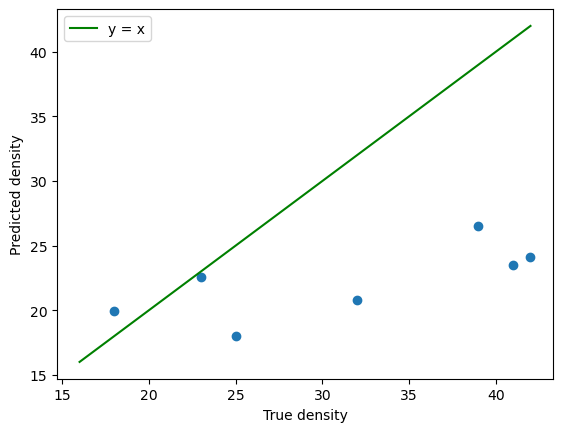

In [72]:
plt.scatter(block_0206_true_and_forecasted_values_df['True_count'], block_0206_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([16, 42], [16, 42], color='green', label='y = x')
plt.legend()
plt.show()

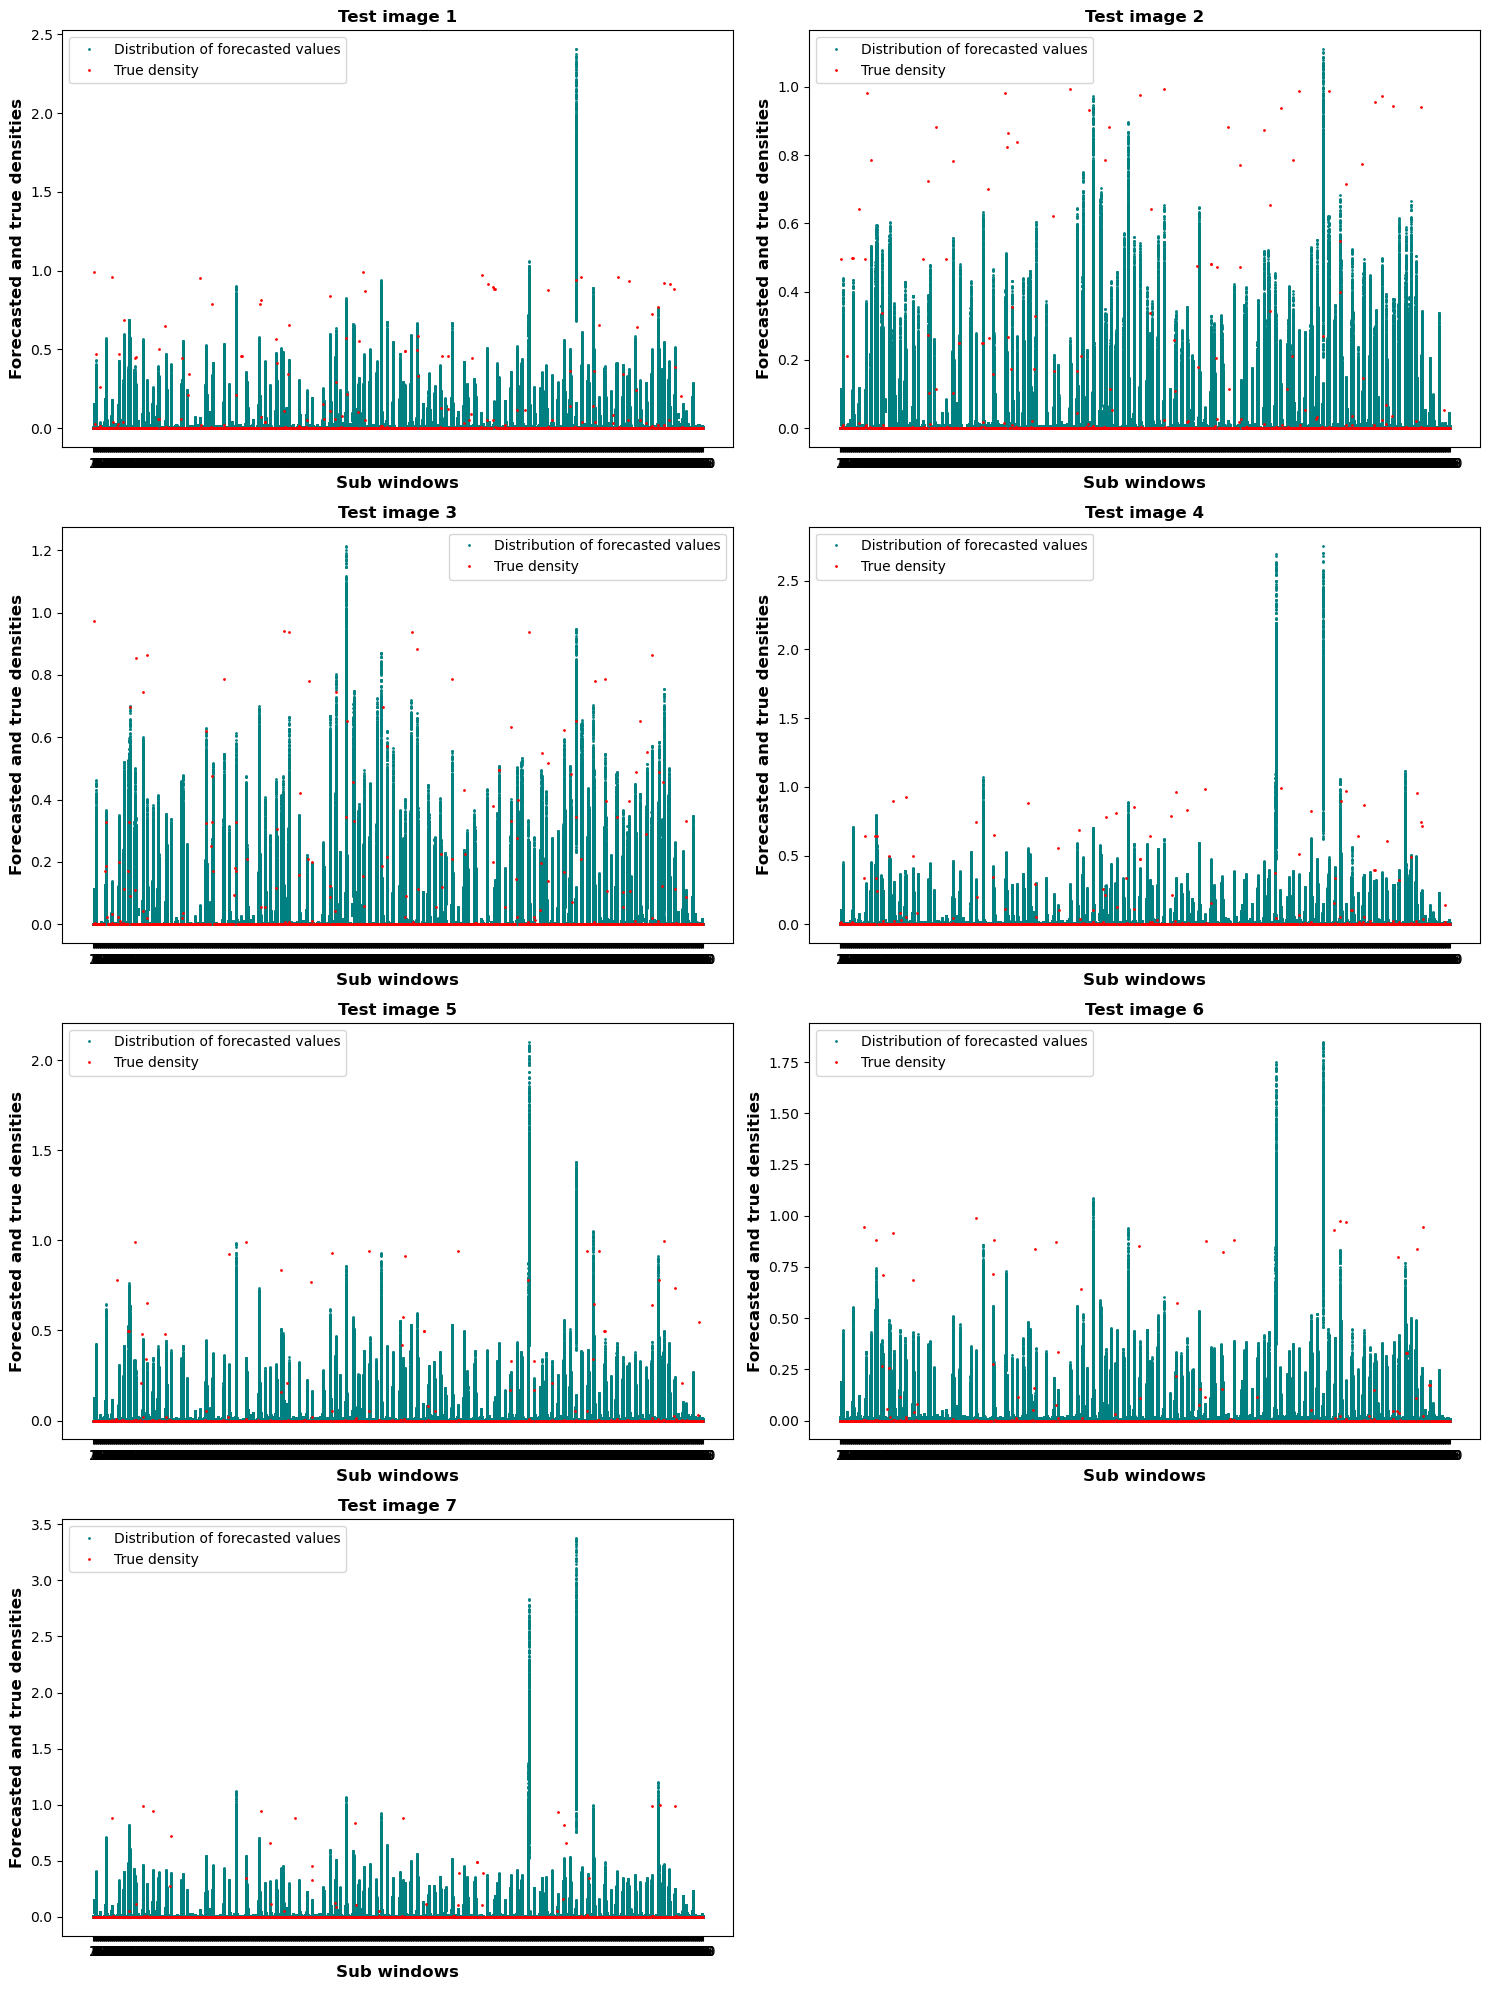

CPU times: user 27.4 s, sys: 868 ms, total: 28.2 s
Wall time: 27.9 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 